In [1]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
img = cv.imread("Vaibhav.JPG")
# opencv BGR channel format and plt reads images as RGB channel format

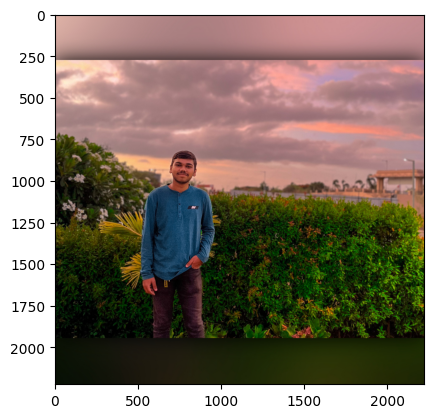

In [3]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img) # RGB 

In [4]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

2/2 [==============================] - 3s 1s/step


In [5]:
results

[{'box': [708, 848, 128, 159],
  'confidence': 0.9999998807907104,
  'keypoints': {'left_eye': (742, 907),
   'right_eye': (804, 917),
   'nose': (768, 939),
   'mouth_left': (737, 961),
   'mouth_right': (796, 970)}},
 {'box': [1602, 1010, 94, 121],
  'confidence': 0.8442893028259277,
  'keypoints': {'left_eye': (1634, 1062),
   'right_eye': (1673, 1057),
   'nose': (1655, 1087),
   'mouth_left': (1639, 1105),
   'mouth_right': (1674, 1101)}},
 {'box': [121, 959, 44, 53],
  'confidence': 0.7317017316818237,
  'keypoints': {'left_eye': (143, 979),
   'right_eye': (154, 981),
   'nose': (151, 986),
   'mouth_left': (145, 996),
   'mouth_right': (154, 997)}}]

In [6]:
x,y,w,h = results[0]['box']

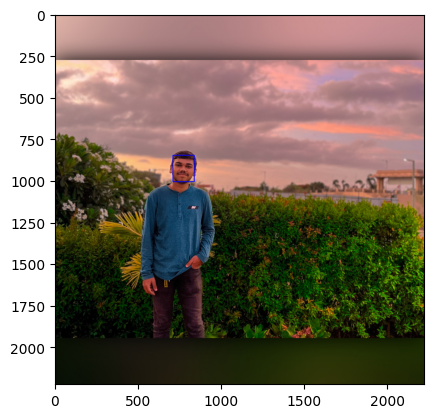

In [7]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 3)
plt.imshow(img)

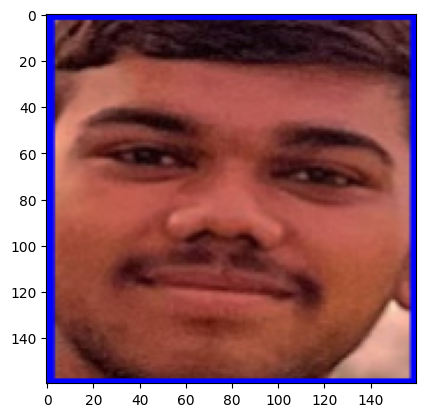

In [8]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160 
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

In [9]:
my_face

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 96,  73, 195],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

In [10]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()
    

    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr
    

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)
        
        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [11]:
faceloading = FACELOADING("dataset")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 12ms/step
Loaded successfully: 250
1/1 [==============================] - 0s 17ms/step
Loaded successfully: 197
1/1 [==============================] - 0s 14ms/step
Loaded successfully: 245
1/1 [==============================] - 0s 13ms/step
Loaded successfully: 250
1/1 [==============================] - 0s 13ms/step
Loaded successfully: 244
1/1 [==============================] - 0s 19ms/step
Loaded successfully: 230
1/1 [==============================] - 0s 15ms/step
Loaded successfully: 252
1/1 [==============================] - 0s 37ms/step
Loaded successfully: 250
1/1 [==============================] - 0s 15ms/step
Loaded successfully: 244
1/1 [==============================] - 0s 45ms/step
Loaded successfully: 246
1/1 [==============================] - 0s 17ms/step
Loaded successfully: 241
1/1 [==============================] - 0s 62ms/step
Loaded successfully: 185
1/1 [==============================] - 0s 22ms/step
Loaded successfully: 249

In [12]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0) 
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [13]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 [==============================] - 0s 41ms/step


In [14]:
np.savez_compressed('faces_embeddings_done_14classes.npz', EMBEDDED_X, Y)

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

Text(0, 0.5, '9')

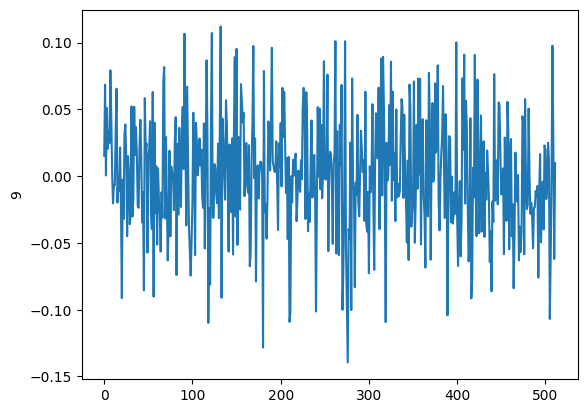

In [16]:
plt.plot(EMBEDDED_X[0]) 
plt.ylabel(Y[0])

In [17]:
Y

array([9, 9, 9, ..., 8, 8, 8])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [20]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(Y_train, ypreds_train)

0.9987966305655837

In [23]:
accuracy_score(Y_test, ypreds_test)

0.9975961538461539

In [24]:
t_im = cv.imread("Vaibhav.JPG")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)

In [25]:
x,y,w,h = detector.detect_faces(t_im)[0]['box']

2/2 [==============================] - 0s 163ms/step


In [26]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 119ms/step


In [27]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [28]:
ypreds

array([13])

In [29]:
y_pred_inv = encoder.inverse_transform(ypreds)
y_pred_inv

array(['vaibhav'], dtype='<U11')

In [30]:
y_pred_inv.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [31]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)